In [1]:
# explore effects of generalizing from softmax normalization to other ways of making a distribution

In [5]:
import LinearAlgebra: transpose

In [6]:
norm_columns(f, x) = f.(x) ./ (sum(f.(x), dims=1))

norm_columns (generic function with 1 method)

In [7]:
norm_rows(f, x) = transpose(norm_columns(f, transpose(x)))

norm_rows (generic function with 1 method)

In [9]:
import Images: Gray

In [10]:
# scale image so that all points brightness are between 0 and 1, and that full range is used
function normalize_image(im)
    im_res = im - minimum(im)
    return (1/maximum(im_res))*im_res
end

normalize_image (generic function with 1 method)

In [11]:
norm_image_columns(f, x) = normalize_image(Gray.(norm_columns(f, x)))

norm_image_columns (generic function with 1 method)

In [12]:
norm_image_rows(f, x) = normalize_image(Gray.(norm_rows(f, x)))

norm_image_rows (generic function with 1 method)

In [13]:
import TestImages: testimage

In [14]:
import ImageView: imshow

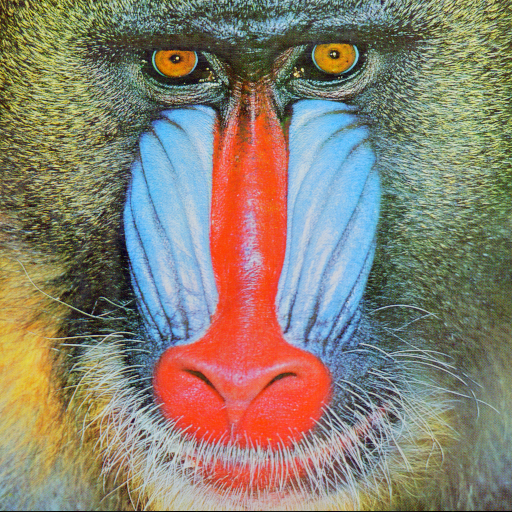

In [15]:
img = testimage("mandrill")

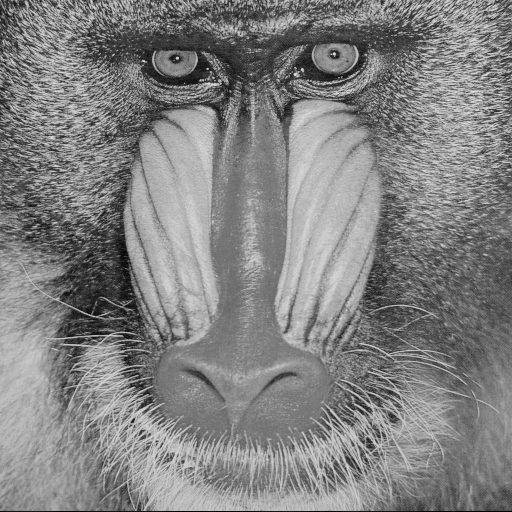

In [16]:
im1 = 1*Gray.(img)

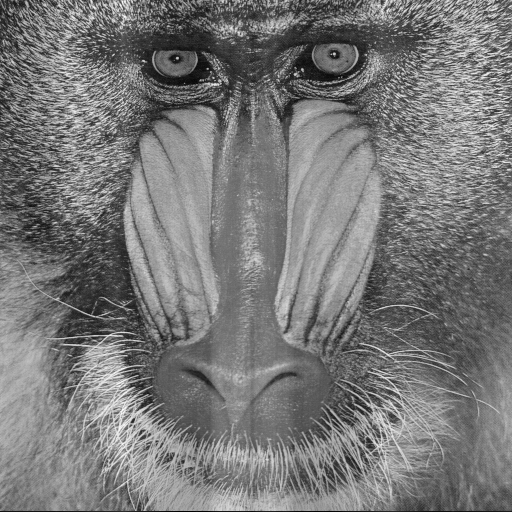

In [17]:
softmax_im1 = norm_image_columns(exp, im1)

In [18]:
transposed_product(x) = normalize_image(transpose(x)*x)

transposed_product (generic function with 1 method)

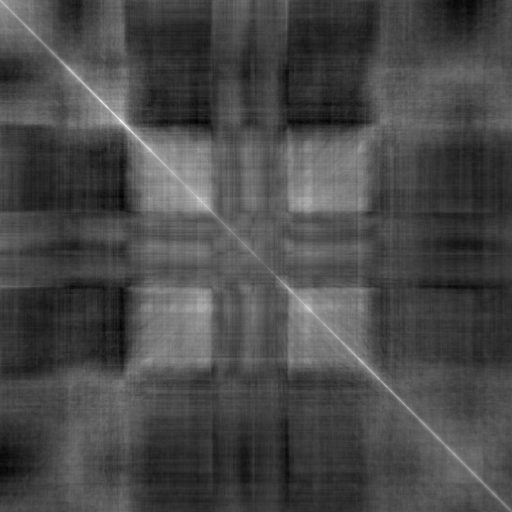

In [19]:
p_with_softmax = transposed_product(softmax_im1)

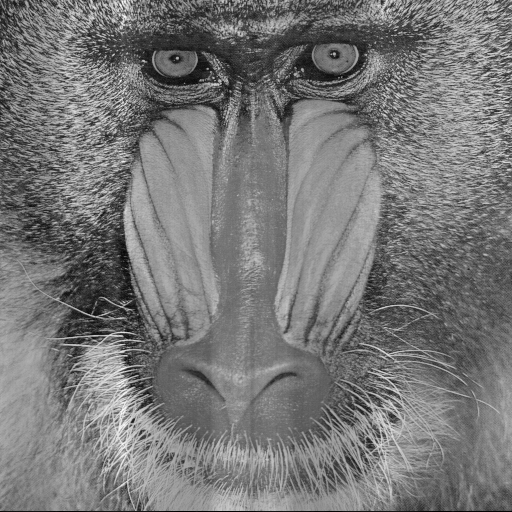

In [21]:
plain_im1 = norm_image_columns(identity, im1)

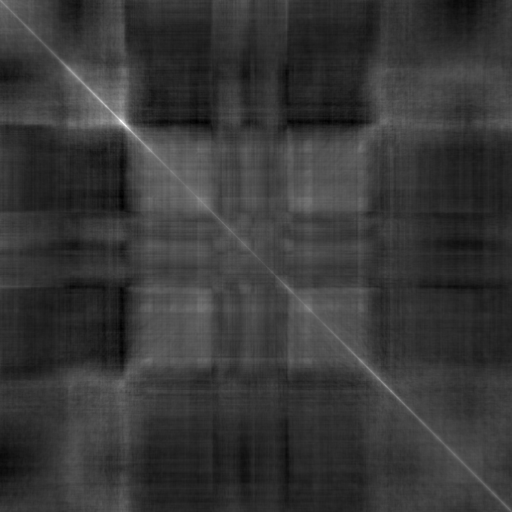

In [22]:
p_with_plain = transposed_product(plain_im1)

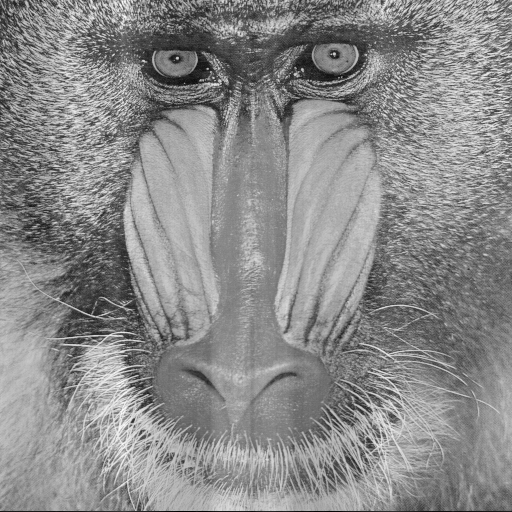

In [25]:
start_at_one_im1 = norm_image_columns(x -> x+1, im1)

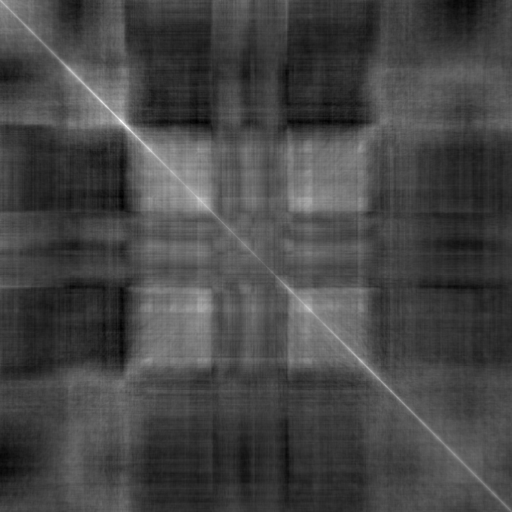

In [26]:
p_with_start_at_one = transposed_product(start_at_one_im1)

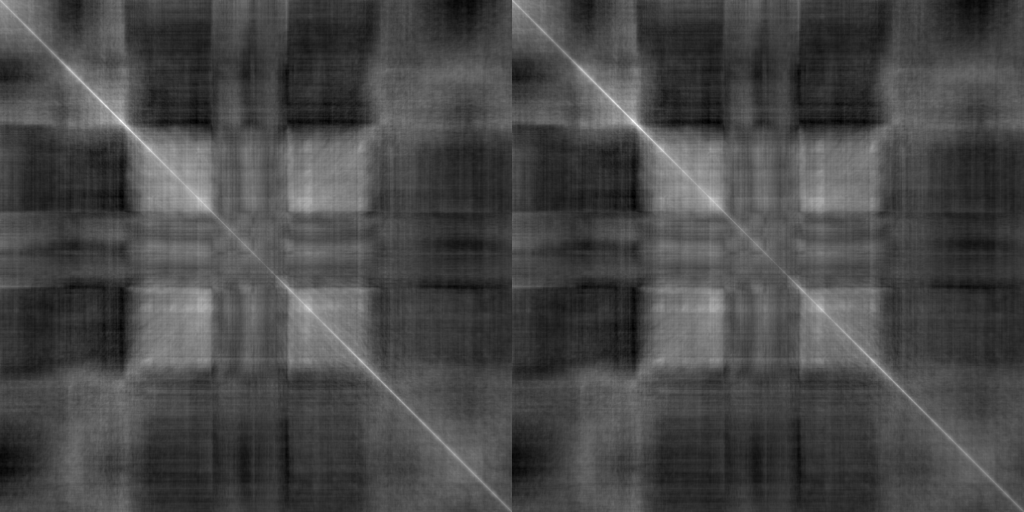

In [27]:
hcat(p_with_softmax, p_with_start_at_one)

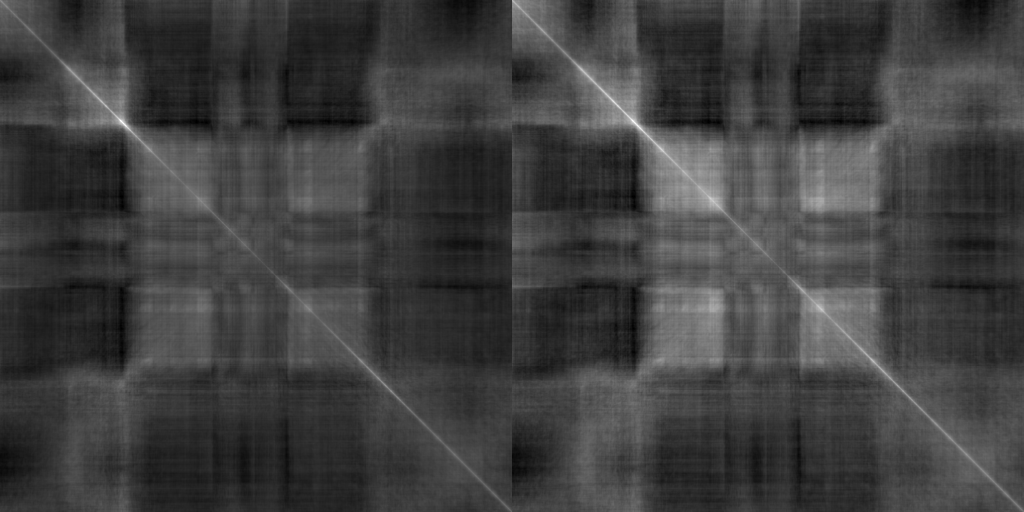

In [28]:
hcat(p_with_plain, p_with_start_at_one)